In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [21]:
file_path = r"C:\Users\Nikhil\Downloads\gym_members_exercise_tracking.csv"
data = pd.read_csv(file_path)

In [22]:
data.head()

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type
0,56,Male,88.3,1.71,1.69,1313,Yoga
1,46,Female,74.9,1.53,1.30,883,HIIT
2,32,Female,68.1,1.66,1.11,677,Cardio
3,25,Male,53.2,1.70,0.59,532,Strength
4,38,Male,46.1,1.79,0.64,556,Strength


In [23]:
data.tail()

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type
968,24,Male,87.1,1.74,1.57,1364,Strength
969,25,Male,66.6,1.61,1.38,1260,Strength
970,59,Female,60.4,1.76,1.72,929,Cardio
971,32,Male,126.4,1.83,1.10,883,HIIT
972,46,Male,88.7,1.63,0.75,542,Strength


In [24]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Session_Duration (hours)    0
Calories_Burned             0
Workout_Type                0
dtype: int64


In [25]:
data['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [26]:
data.describe()


,Age,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned
count,973.000000,973.000000,973.00000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,1.256423,903.819116
std,12.180928,21.207500,0.12772,0.343033,269.356989
min,18.000000,40.000000,1.50000,0.500000,303.000000
25%,28.000000,58.100000,1.62000,1.040000,720.000000
50%,40.000000,70.000000,1.71000,1.260000,893.000000
75%,49.000000,86.000000,1.80000,1.460000,1076.000000
max,59.000000,129.900000,2.00000,2.000000,1783.000000


In [27]:
age_column = 'Age' 

In [28]:
mean_age = data[age_column].mean()
print(f"Mean Age: {mean_age}")

Mean Age: 38.68345323741007


In [29]:
median_age = data[age_column].median()
print(f"Median Age: {median_age}")

Median Age: 40.0


In [30]:
mode_age = data[age_column].mode().iloc[0]
print(f"Mode Age: {mode_age}")

Mode Age: 43


In [31]:
std_dev_age = data[age_column].std()
print(f"Standard Deviation of Age: {std_dev_age}")

Standard Deviation of Age: 12.180927866987108


In [32]:
# Select relevant numerical columns for correlation analysis
# Modify this list based on the actual column names in your dataset
correlation_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 'Calories_Burned']

In [33]:
 correlation_matrix = data[correlation_columns].corr()

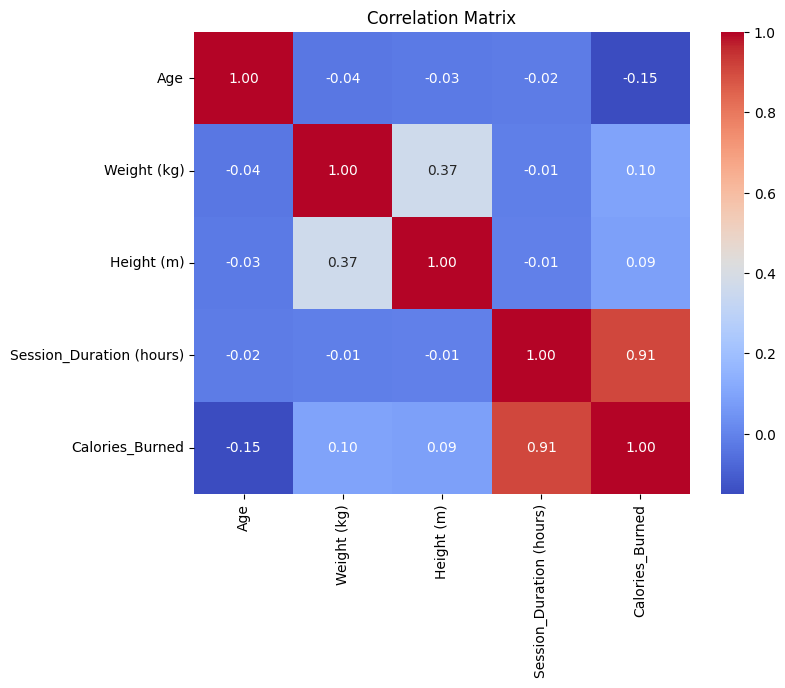

In [34]:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()

In [35]:
correlation_calories_duration = data['Calories_Burned'].corr(data['Session_Duration (hours)'])
print(f"Correlation between Calories Burned and Session Duration: {correlation_calories_duration}")

Correlation between Calories Burned and Session Duration: 0.9084212452186216


In [36]:
skewness_values = data.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness:\n", skewness_values)


Skewness:
 Age                        -0.077864
Weight (kg)                 0.772384
Height (m)                  0.338858
Session_Duration (hours)    0.025761
Calories_Burned             0.226922
dtype: float64


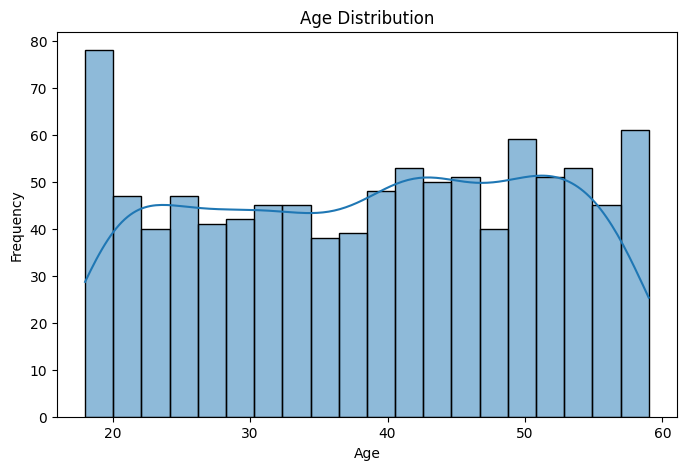

In [37]:
#Visualization of Age Distribution with Histogram and KDE
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

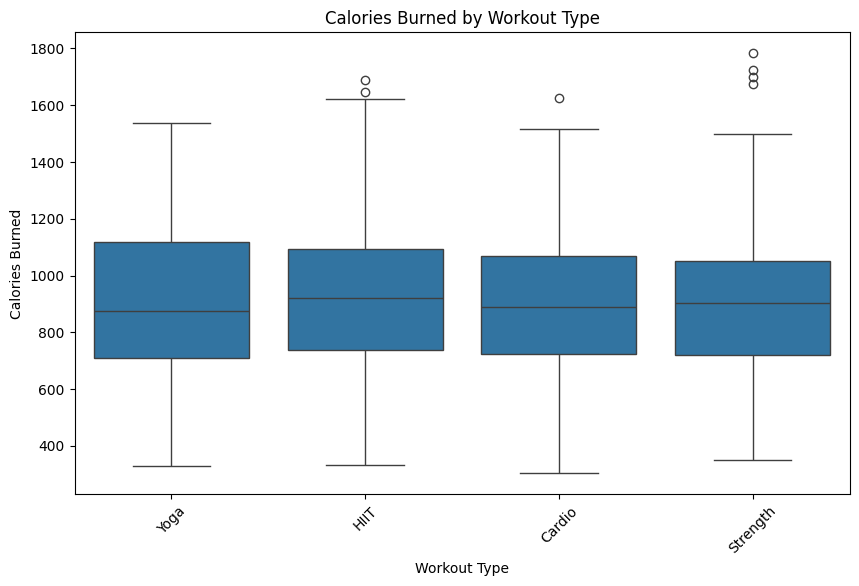

In [38]:
# Workout Type vs Calories Burned
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=data)
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Define the bounds for acceptable values (removing outliers)
Q1 = data['Calories_Burned'].quantile(0.25)
Q3 = data['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
# Filter out the outliers from the dataset
filtered_data = data[(data['Calories_Burned'] >= lower_bound) & (data['Calories_Burned'] <= upper_bound)]


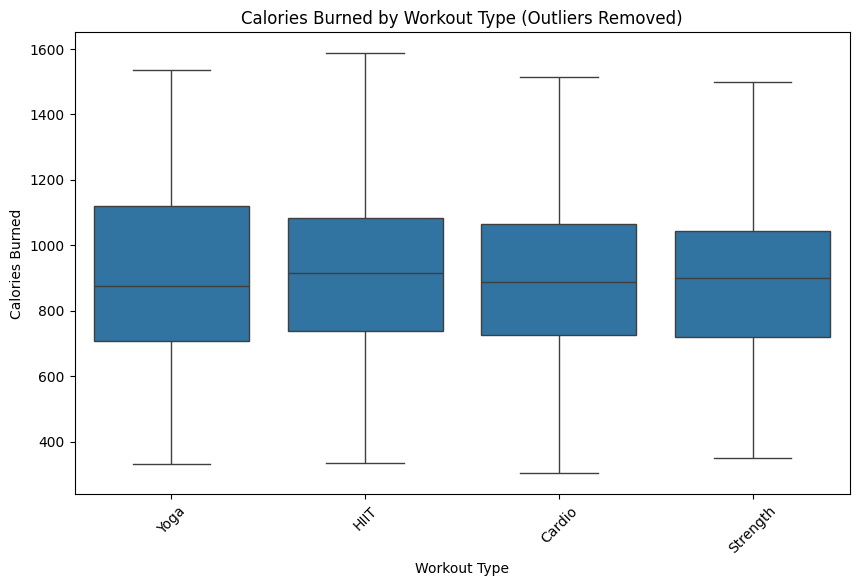

In [48]:
# Create the boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=filtered_data)
plt.title('Calories Burned by Workout Type (Outliers Removed)')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Step 4: Hypothesis Testing
# Test if there's a significant difference in calories burned based on workout type
workout_groups = data.groupby('Workout_Type')['Calories_Burned']
hypothesis_test = stats.f_oneway(*[group for name, group in workout_groups])
print("Hypothesis Test Results (ANOVA):\n", hypothesis_test)

Hypothesis Test Results (ANOVA):
 F_onewayResult(statistic=np.float64(0.8776079857128037), pvalue=np.float64(0.4521485662330851))


In [112]:
# Step 6: Confidence Interval for Mean Calories Burned
calories_mean = data['Calories_Burned'].mean()
calories_std = data['Calories_Burned'].std()
n = len(data['Calories_Burned'])
conf_interval = stats.t.interval(0.95, n-1, loc=calories_mean, scale=calories_std/np.sqrt(n))
print("95% Confidence Interval for Mean Calories Burned:", conf_interval)

95% Confidence Interval for Mean Calories Burned: (np.float64(886.8733565141965), np.float64(920.7648757571292))


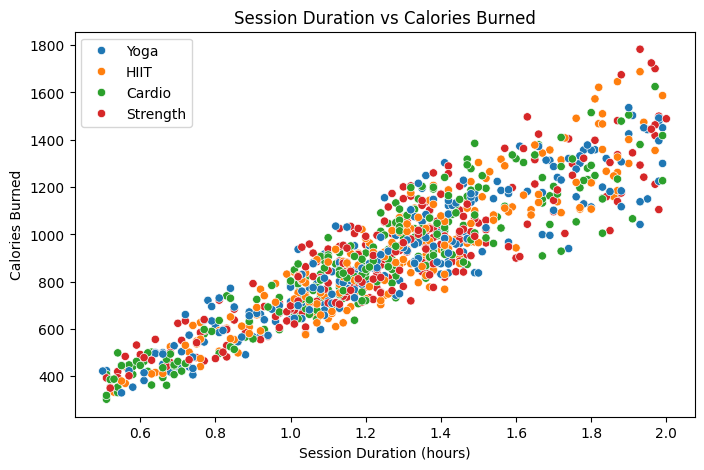

In [113]:
# Step 7: Additional Visualizations
# Scatter plot of Session Duration vs Calories Burned
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=data, hue='Workout_Type')
plt.title('Session Duration vs Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

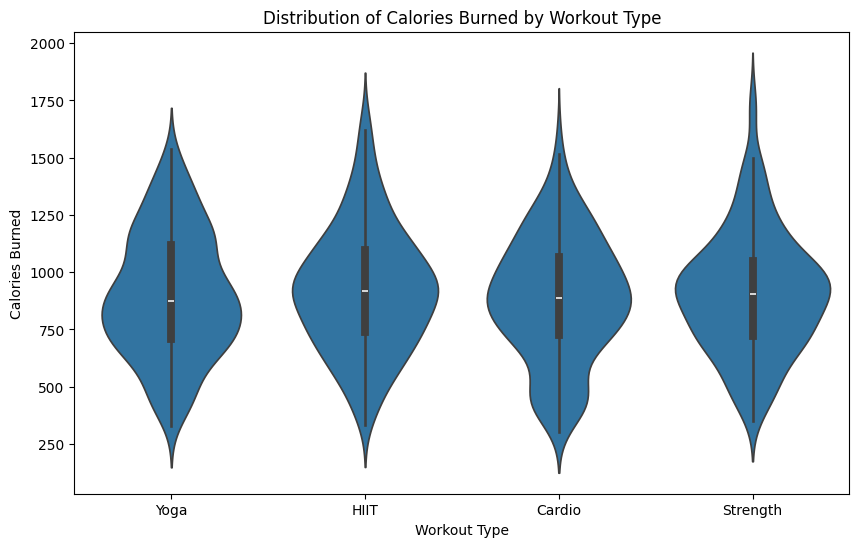

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Workout_Type', y='Calories_Burned', data=data)
plt.title('Distribution of Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()